## Data wrangling

1. Create a `DataFrame` named `df` with 6 nrows with the following columns:

    - `A`: random floating point value
    - `B`: randomly assigned categorical values from `["test", "train"]`
    - `C`: random integer values, constructed from an `numpy.array`
    - `D`: random integer values, constructed from a `Series`
    - `E`: monthly dates "2021-01-01", "2021-02-01", "2021-03-01" ...

In [1]:
import pandas as pd
import numpy as np
import random
import datetime

nrows = 6

df = pd.DataFrame(columns=["A","B","C","D","E"])
df["A"] = [random.random() for i in range(nrows)]
df["B"] = [random.choice(["train","test"]) for i in range(nrows)]
df["C"] = np.random.randint(100,size=nrows)
df["D"] = pd.Series(np.random.randint(100,size=nrows))
df["E"] = [datetime.date(2021, m, 1).strftime('2021-%m-1') for m in range(1, nrows+1)]
print(df)

          A      B   C   D          E
0  0.540248   test   6  70  2021-01-1
1  0.790499  train  72  59  2021-02-1
2  0.569888  train  80  49  2021-03-1
3  0.637937   test  18  49  2021-04-1
4  0.579139  train   5  56  2021-05-1
5  0.319036   test  87  35  2021-06-1


2. Convert numeric columns into a `numpy.matrix` and compute the row sums.

In [2]:
df_array = df[["A", "C", "D"]].to_numpy()
print(np.sum(df_array, axis=1))

[ 76.5402479  131.79049891 129.56988755  67.63793665  61.57913859
 122.31903582]


3. Sort `df` by column `C`.

In [3]:
print(df.sort_values('C'))

          A      B   C   D          E
4  0.579139  train   5  56  2021-05-1
0  0.540248   test   6  70  2021-01-1
3  0.637937   test  18  49  2021-04-1
1  0.790499  train  72  59  2021-02-1
2  0.569888  train  80  49  2021-03-1
5  0.319036   test  87  35  2021-06-1


4. Filter `df` for entries for which `B` has value `train` and `C`
   has values greater than 0.

In [4]:
print(df.loc[(df["B"] == "train") & (df["C"] > 0)])

          A      B   C   D          E
1  0.790499  train  72  59  2021-02-1
2  0.569888  train  80  49  2021-03-1
4  0.579139  train   5  56  2021-05-1


5. Change the value in the 4th column and 2nd row to 10.

In [5]:
print(df)

          A      B   C   D          E
0  0.540248   test   6  70  2021-01-1
1  0.790499  train  72  59  2021-02-1
2  0.569888  train  80  49  2021-03-1
3  0.637937   test  18  49  2021-04-1
4  0.579139  train   5  56  2021-05-1
5  0.319036   test  87  35  2021-06-1


In [6]:
df.at[1, "D"] = 10
print(df)

          A      B   C   D          E
0  0.540248   test   6  70  2021-01-1
1  0.790499  train  72  10  2021-02-1
2  0.569888  train  80  49  2021-03-1
3  0.637937   test  18  49  2021-04-1
4  0.579139  train   5  56  2021-05-1
5  0.319036   test  87  35  2021-06-1


6. Create a column `F` where half the values are `NaN`.

In [7]:
df["F"] = [random.random() for i in range(len(df))]
df.loc[len(df)/2:, "F"] = np.nan
print(df)

          A      B   C   D          E         F
0  0.540248   test   6  70  2021-01-1  0.261304
1  0.790499  train  72  10  2021-02-1  0.034873
2  0.569888  train  80  49  2021-03-1  0.639222
3  0.637937   test  18  49  2021-04-1       NaN
4  0.579139  train   5  56  2021-05-1       NaN
5  0.319036   test  87  35  2021-06-1       NaN


7. Deal with missing values in two different ways:
    
    - remove entries with missing data
    - fill missing values with 0

In [8]:
print(df.dropna())

          A      B   C   D          E         F
0  0.540248   test   6  70  2021-01-1  0.261304
1  0.790499  train  72  10  2021-02-1  0.034873
2  0.569888  train  80  49  2021-03-1  0.639222


In [9]:
print(df.fillna(0))

          A      B   C   D          E         F
0  0.540248   test   6  70  2021-01-1  0.261304
1  0.790499  train  72  10  2021-02-1  0.034873
2  0.569888  train  80  49  2021-03-1  0.639222
3  0.637937   test  18  49  2021-04-1  0.000000
4  0.579139  train   5  56  2021-05-1  0.000000
5  0.319036   test  87  35  2021-06-1  0.000000


8. Convert column `A` into a cumulative sum.

In [10]:
print(df)

          A      B   C   D          E         F
0  0.540248   test   6  70  2021-01-1  0.261304
1  0.790499  train  72  10  2021-02-1  0.034873
2  0.569888  train  80  49  2021-03-1  0.639222
3  0.637937   test  18  49  2021-04-1       NaN
4  0.579139  train   5  56  2021-05-1       NaN
5  0.319036   test  87  35  2021-06-1       NaN


In [11]:
df["A"] = df["A"].cumsum()
print(df)

          A      B   C   D          E         F
0  0.540248   test   6  70  2021-01-1  0.261304
1  1.330747  train  72  10  2021-02-1  0.034873
2  1.900634  train  80  49  2021-03-1  0.639222
3  2.538571   test  18  49  2021-04-1       NaN
4  3.117710  train   5  56  2021-05-1       NaN
5  3.436745   test  87  35  2021-06-1       NaN


9. Subtract column `A` from column `B`.

(subtracting A from B returns value type error (str - float) so have calculated C - A)!

In [12]:
print(df["C"]-df["A"])

0     5.459752
1    70.669253
2    78.099366
3    15.461429
4     1.882290
5    83.563255
dtype: float64


10. Plot the numeric columns as a line plot, ensuring that the plot has proper labels.

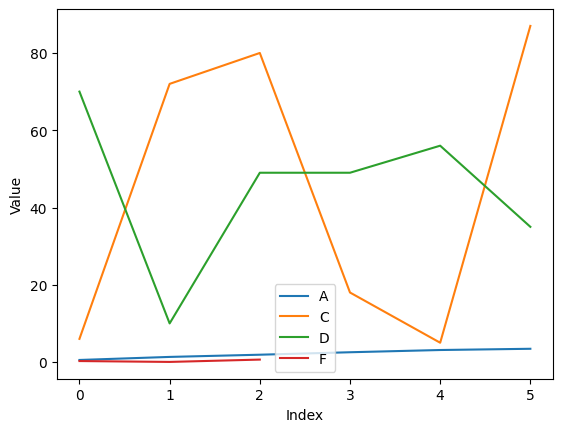

In [13]:
import matplotlib.pyplot as plt

lines = df.plot.line()
lines.set(xlabel='Index', ylabel='Value')
# display plot
plt.show()

11. Compute the mean values of each column for groups `train` and `test`.

In [14]:
df.groupby("B")[['A','C','D','F']].mean()

,A,C,D,F
B,,,,
test,2.171855,37.000000,51.333333,0.261304
train,2.116364,52.333333,38.333333,0.337048


12. Convert the following `DataFrame` from `a` into `b` (long to wide).
    Additionally, convert from `b` into `a` (wide to long).

```
a = pd.DataFrame(
    {"value": [1, 2, 3, 4, 5, 6], "group": ["a", "a", "a", "b", "b", "b"]}
)

b = pd.DataFrame(
    {"a": [1, 2, 3], "b": [4, 5, 6]}
)
```

In [15]:
# A into B
a = pd.DataFrame(
    {"value": [1, 2, 3, 4, 5, 6], "group": ["a", "a", "a", "b", "b", "b"]}
)

bnew = pd.DataFrame(columns=["a","b"])
bnew["a"] = a.loc[a['group'] == "a", 'value'].values
bnew["b"] = a.loc[a['group'] == "b", 'value'].values
bnew

,a,b
0,1,4
1,2,5
2,3,6


In [16]:
# B into A
b = pd.DataFrame(
    {"a": [1, 2, 3], "b": [4, 5, 6]}
)

b.melt(var_name="group",value_name="value")

,group,value
0,a,1
1,a,2
2,a,3
3,b,4
4,b,5
5,b,6


## Supervised learning

1. Load the `iris` dataset by
```
import sklearn as sk
iris = sk.datasets.load_iris()
```

In [17]:
import sklearn
from sklearn.datasets import load_iris
iris = load_iris()

2. Visualize the data matrix.

In [18]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [19]:
print(iris.feature_names)
print(iris.target_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


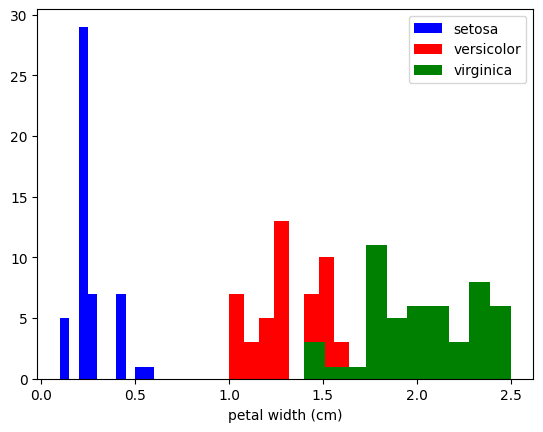

In [20]:
fig, ax = plt.subplots()
x_index = 3
colors = ['blue', 'red', 'green']

for label, color in zip(range(len(iris.target_names)), colors):
    ax.hist(iris.data[iris.target==label, x_index], 
            label=iris.target_names[label],
            color=color)

ax.set_xlabel(iris.feature_names[x_index])
ax.legend(loc='upper right')
plt.show()

Text(0, 0.5, '2nd principal component')

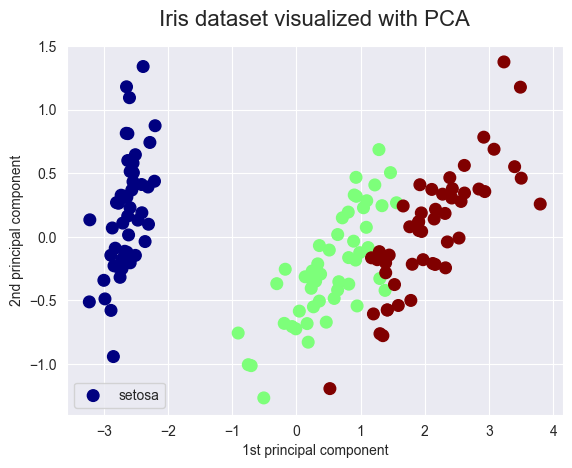

In [21]:
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.cm as cm

pca = PCA(n_components=2)
points = pca.fit_transform(iris.data)

sns.set_style("darkgrid")

plt.scatter(points[:,0], points[:,1],
    c=iris.target,
    cmap=cm.jet,
    s=70)

plt.legend(iris.target_names)
plt.title('Iris dataset visualized with PCA', fontsize=16, y=1.03)

plt.xlabel("1st principal component", fontsize=10)
plt.ylabel("2nd principal component", fontsize=10)

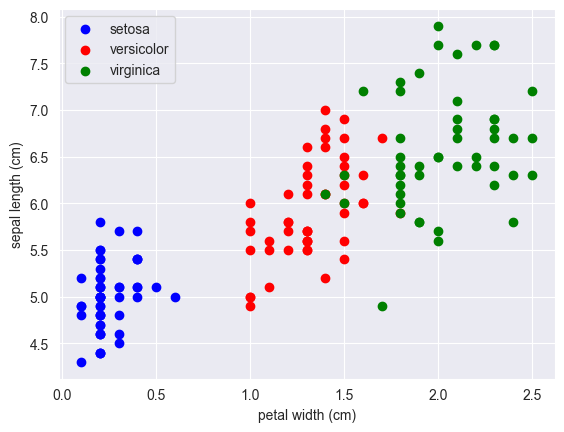

In [22]:
fig, ax = plt.subplots()

x_index = 3
y_index = 0

colors = ['blue', 'red', 'green']

for label, color in zip(range(len(iris.target_names)), colors):
    ax.scatter(iris.data[iris.target==label, x_index], 
                iris.data[iris.target==label, y_index],
                label=iris.target_names[label],
                c=color)

ax.set_xlabel(iris.feature_names[x_index])
ax.set_ylabel(iris.feature_names[y_index])
ax.legend(loc='upper left')
plt.show()

In [23]:
from collections import Counter

print("len of data: ", len(iris.data), "\nlen of terget: ", len(iris.data),"\n")
print(Counter(iris.target).keys()) # equals to list(set(words))
print(Counter(iris.target).values()) # counts the elements' frequency)

len of data:  150 
len of terget:  150 

dict_keys([0, 1, 2])
dict_values([50, 50, 50])


3. Train a random forest classifier to predict the target values and 
   report its performance using an appropriate evaluation metric.

In [24]:
data=pd.DataFrame({
    'sepal length':iris.data[:,0],
    'sepal width':iris.data[:,1],
    'petal length':iris.data[:,2],
    'petal width':iris.data[:,3],
    'species':iris.target
})
data.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [25]:
from sklearn.model_selection import train_test_split

X=data[['sepal length', 'sepal width', 'petal length', 'petal width']]  # Features
y=data['species']  # Labels

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

In [26]:
from sklearn.ensemble import RandomForestClassifier

#Create a simple RF Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train simple RF classifier
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [27]:
from sklearn import metrics
# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9777777777777777


In [28]:
species_idx = clf.predict([[3, 5, 4, 2]])[0]
iris.target_names[species_idx]

/Users/i/miniconda3/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


'virginica'

In [29]:
from sklearn.model_selection import GridSearchCV

# Train cross-validated RF classifier
clf = RandomForestClassifier(class_weight='balanced', random_state=42)

param_grid = {
    "max_depth": [1,2,3,5,10,20],
    "n_estimators": [10,50,100,150,200,300]
}

grid = GridSearchCV(clf, cv=5, param_grid=param_grid,scoring='accuracy')

grid.fit(X_train,y_train)

# Print best CV metric and tuned parameters
print('Best CV score: ', grid.best_score_)
print('Best CV params: ', grid.best_params_)

# save your best model 1
classifier1 = grid.best_estimator_

Best CV score:  0.9619047619047618
Best CV params:  {'max_depth': 5, 'n_estimators': 10}


In [30]:
y_pred_best=classifier1.predict(X_test)
print("Cross-validated Accuracy:",metrics.accuracy_score(y_test, y_pred_best))

Cross-validated Accuracy: 0.9777777777777777


Note that <u>**accuracy**</u> is a good measure of performance due to the balanced nature of the data (50 samples from each species), meaning biases due to unbalanced training data is not relevant.

4. Explain how key parameters of the random forest classifier would influence its peformance.

As seen in the cross-validated method above, the main parameters of a Random Forest classifier that affect its performance are the **depth** and **# of decision trees** in the model.

The depth refers to the number of splits each tree possesses, and therefore a larger depth model increases the tree's ability to capture training distributions. Typical decision tress can suffer from overfitting with increased depth, but this observation is reduced in RF classifiers via bagging. Nonetheless, this is still a potential issue at extreme cases.

Usually, increasing n_estimators (the # of trees) increases performance by further decorrelating trees, increasing feature randomness and reducing overfitting. However, more estimators increases the size of the model and increases training time considerably (i.e. increased computational cost). Therefore, finding the optimum number is important.

## Text mining

1. Using `Biopython`, collect medline abstracts on "medulloblastoma"
   published in 2012. Save the data to disk as a CSV table.

In [31]:
from Bio import Entrez
Entrez.email = "ibrahim.nawaz1@icloud.com"  # Always tell NCBI who you are
handle = Entrez.egquery(term="medulloblastoma")
record = Entrez.read(handle)
for row in record["eGQueryResult"]:
    if row["DbName"] == "pubmed":
        n_articles = row["Count"]
        print(n_articles)

10577


In [32]:
handle = Entrez.esearch(db="pubmed", term="medulloblastoma", retmax=n_articles)
record = Entrez.read(handle)
handle.close()
idlist = record["IdList"]
print(idlist)

['37114557', '37114244', '37113402', '37113160', '37093271', '37090638', '37083768', '37082141', '37081608', '37080859', '37074909', '37064720', '37061180', '37050422', '37046804', '37046633', '26389418', '37035203', '37029430', '37022464', '37021628', '37020198', '37016281', '37014508', '37013660', '37013321', '37011459', '37009528', '37008255', '37006607', '37004712', '37000354', '36990222', '36987975', '36982406', '36979108', '36970175', '36970168', '36968588', '36966045', '36961676', '36951979', '36941703', '36937322', '36934287', '36926247', '36923256', '36920679', '36918827', '36917640', '36916326', '36909024', '36905668', '36905085', '36903631', '36900238', '36899402', '36898329', '36896395', '36892621', '36891437', '36890823', '36871657', '36869047', '36864284', '36864161', '36859485', '36854987', '36853490', '36849558', '36841424', '36840836', '36839827', '36835950', '36831670', '36831595', '36831428', '36829544', '36826523', '36825822', '36825029', '36822958', '36813922', '36

In [33]:
from Bio import Medline
handle = Entrez.efetch(db="pubmed", id=idlist, rettype="medline", retmode="text")
records = Medline.parse(handle)
records = list(records)

In [34]:
print("dict keys: ",records[0].keys(), "\n")
print("Example abstract: ",records[0]['AB'])

dict keys:  dict_keys(['PMID', 'OWN', 'STAT', 'LR', 'IS', 'VI', 'IP', 'DP', 'TI', 'LID', 'AB', 'FAU', 'AU', 'AD', 'LA', 'PT', 'DEP', 'PL', 'TA', 'JT', 'JID', 'SB', 'OTO', 'OT', 'EDAT', 'MHDA', 'CRDT', 'PHST', 'AID', 'PST', 'SO']) 

Example abstract:  The most aggressive subtype of medulloblastoma (MB), Group 3, is characterized by MYC amplifications. However, targeting MYC has proven unsuccessful, and there remains a lack of therapeutic targets for treating MB. Studies have shown that the B7 homolog 3 (B7‑H3) promotes cell proliferation and tumor cell invasion in a variety of cancers. Similarly, it was recently revealed that B7‑H3 promotes angiogenesis in Group 3 MB and likely facilitates MB metastasis through exosome biogenesis. While therapies targeting B7‑H3 remain in the early stages of development, targeting upstream regulators of B7‑H3 expression may be more effective for halting MB progression. Notably, MYC and the enhancer of zeste homolog 2 (EZH2) are known to regulate B7‑H3 e

In [35]:
medline_df = pd.DataFrame(records)
medline_df['DP'].isna().sum() # 0, therefore all dates are present

0

In [36]:
print(len(medline_df.loc[medline_df['DP'].str.startswith('2012')])) # 383 papers from 2012 with "medulloblastoma" in title.

383


In [37]:
# Save to disk
medline_df = medline_df.loc[medline_df['DP'].str.startswith('2012')]
medline_df[['PMID','DP','TI','AB','AU']].to_csv('/Users/i/Downloads/medulloblastoma_papers.csv', index=False)

2. Import the CSV table and build a SQLite database.

In [39]:
import sqlite3
import json

con = sqlite3.connect('/Users/i/Downloads/medline.db')
    
medline_df[['PMID','DP','TI','AB','AU']].astype(str).to_sql('Medulloblastoma', con, if_exists='replace')

383

3. Obtain the PMID and title of publications for authors with the surname
   "Shih" from the database.

In [45]:
cur = con.cursor()
cur.execute("SELECT PMID, TI FROM 'Medulloblastoma' WHERE AU LIKE '%Shih %'")

rows = cur.fetchall()

for row in rows:
    print(row)

('22832583', 'Dissecting the genomic complexity underlying medulloblastoma.')
('22832581', 'Subgroup-specific structural variation across 1,000 medulloblastoma genomes.')
('22358458', 'Subgroup-specific alternative splicing in medulloblastoma.')
('22343890', 'Clonal selection drives genetic divergence of metastatic medulloblastoma.')
('22265402', 'Genome sequencing of pediatric medulloblastoma links catastrophic DNA rearrangements with TP53 mutations.')
('22057785', 'Rapid, reliable, and reproducible molecular sub-grouping of clinical medulloblastoma samples.')


## Neural network

1. Implement a full connected feedforward network from scratch using 
only the `numpy` library with the following layers:
one input, two hidden, and one output.
Neurons should use the sigmoid transfer function.
The network should be trained using
[backpropagation of errors](https://dustinstansbury.github.io/theclevermachine/derivation-backpropagation).

/var/folders/j6/lhr66f7948b_h94lpm0p2hy80000gn/T/ipykernel_82281/1645636039.py:15: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[0, :], Y, s=40, cmap=plt.cm.Spectral)


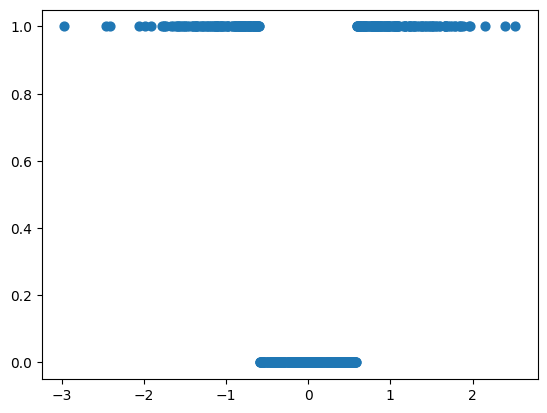

In [51]:
import sklearn.datasets
import numpy as np
import matplotlib.pyplot as plt

# generate non-linearly seperated data
def load_extra_datasets():  
    N = 500
    gaussian_quantiles = sklearn.datasets.make_gaussian_quantiles(mean=None, cov=0.7, n_samples=N, n_features=1, n_classes=2,  shuffle=True, random_state=None)
    return  gaussian_quantiles

gaussian_quantiles = load_extra_datasets()
X, Y = gaussian_quantiles
X, Y = X.T, Y.reshape(1, Y.shape[0])

plt.scatter(X[0, :], Y, s=40, cmap=plt.cm.Spectral)

In [52]:
#X and Y are the input and output variables
n_x = X.shape[0]    # size of input layer`
n_h = 2             # size of hidden layer
n_y = Y.shape[0]    # size of output layer

layer_sizes = (n_x, n_h, n_y)
print(layer_sizes)

(1, 2, 1)


In [53]:
def initialize_parameters(n_x, n_h, n_y):
    W1 = np.random.randn(n_h, n_x) * 0.01
    b1 = np.zeros((n_h, 1))
    W2 = np.random.randn(n_y, n_h) * 0.01
    b2 = np.zeros((n_y, 1))
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

def sigmoid(z):
    s = 1.0/(1.0 + np.exp(-1.0 * z))
    return s


def forward_propagation(X, parameters):
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    # preds
    Z1 = np.add(np.matmul(W1, X), b1)
    A1 = np.tanh(Z1)
    Z2 = np.add(np.matmul(W2, A1), b2)
    A2 = sigmoid(Z2)
    
    assert(A2.shape == (1, X.shape[1]))
    
    # store
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    return A2, cache

def compute_cost(A2, Y):
    m = Y.shape[1]

    # cross-entropy loss
    logprobs = np.multiply(Y, np.log(A2)) + np.multiply((1 - Y), np.log(1 - A2))
    cost = (-1.0/m) * np.sum(logprobs)
    
    cost = np.squeeze(cost)
    assert(isinstance(cost, float))
    
    return cost

def backward_propagation(parameters, cache, X, Y):
    m = X.shape[1]
    
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    A1 = cache["A1"]
    A2 = cache["A2"]
    
    # backprop
    dZ2 = A2 - Y
    dW2 = (1.0/m) * np.matmul(dZ2, np.transpose(A1))
    db2 = (1.0/m) * np.sum(dZ2, axis=1, keepdims=True)
    # sigmoid der
    dZ1 = np.matmul(np.transpose(W2), dZ2) * (1 - np.power(A1, 2))

    dW1 = (1.0/m) * np.matmul(dZ1, np.transpose(X))
    db1 = (1.0/m) * np.sum(dZ1, axis=1, keepdims=True)
    
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    
    return grads

def update_parameters(parameters, grads, learning_rate = 1.2):
    # retrieve params
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    # retrieve grad
    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]
    
    # grad descent
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [54]:
def nn_model(X, Y, n_h, num_iterations = 10000, learning_rate=1.2, print_cost=False):
    
    # combine functions
    n_x = X.shape[0]
    n_y = Y.shape[0]
    parameters = initialize_parameters(n_x, n_h, n_y)
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    # train
    costs = []
    for i in range(0, num_iterations):
        A2, cache = forward_propagation(X, parameters)
        cost = compute_cost(A2, Y)
        costs.append(cost)
        grads = backward_propagation(parameters, cache, X, Y)
        parameters = update_parameters(parameters, grads, learning_rate=learning_rate)

        trained_model = {
            "layer_sizes": (n_x, n_h, n_y),
            "learning_rate": learning_rate,
            "costs": costs,
            "parameters": parameters,
        }

        if print_cost and i % 10 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    return trained_model

In [55]:
def predict(parameters, X):
    A2, cache = forward_propagation(X, parameters)
    predictions = A2 > 0.5
    
    return predictions

def plot_costs(trained_model):
    costs = np.squeeze(trained_model["costs"])
    plt.plot(costs)
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate ={},\n layer_sizes={}\n".format(
        trained_model["learning_rate"], trained_model["layer_sizes"],
    ))

Cost after iteration 0: 0.693148
Cost after iteration 10: 0.693148
Cost after iteration 20: 0.693148
Cost after iteration 30: 0.693148
Cost after iteration 40: 0.693147
Cost after iteration 50: 0.693147
Cost after iteration 60: 0.693147
Cost after iteration 70: 0.693147
Cost after iteration 80: 0.693147
Cost after iteration 90: 0.693147
Cost after iteration 100: 0.693147
Cost after iteration 110: 0.693146
Cost after iteration 120: 0.693146
Cost after iteration 130: 0.693146
Cost after iteration 140: 0.693145
Cost after iteration 150: 0.693144
Cost after iteration 160: 0.693143
Cost after iteration 170: 0.693141
Cost after iteration 180: 0.693139
Cost after iteration 190: 0.693135
Cost after iteration 200: 0.693131
Cost after iteration 210: 0.693124
Cost after iteration 220: 0.693115
Cost after iteration 230: 0.693102
Cost after iteration 240: 0.693084
Cost after iteration 250: 0.693061
Cost after iteration 260: 0.693030
Cost after iteration 270: 0.692991
Cost after iteration 280: 0.692

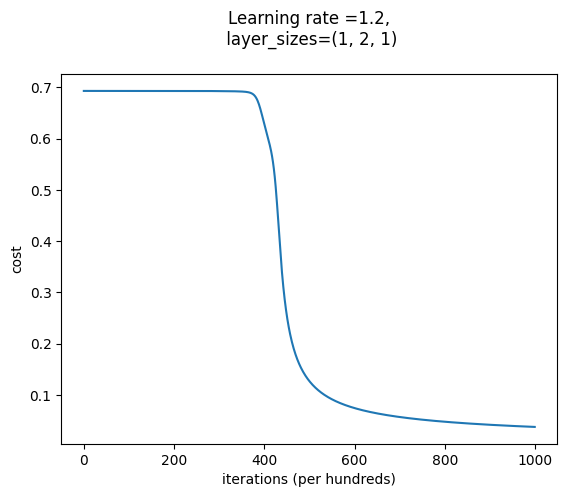

In [56]:
trained_model = nn_model(X, Y, n_h, num_iterations = 1000, print_cost=True)

plot_costs(trained_model)

In [57]:
preds = predict(parameters=trained_model['parameters'],X=X)
print('Accuracy: ', float((np.dot(Y,preds.T)) + np.dot(1-Y,1-preds.T))/float(Y.size))

Accuracy:  1.0
